In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint 

In [2]:
# Create a file path to the cleaned crash data
crash_data_cleaned_path = "Data/cleaned_crash_data.csv"


# Read the crash data as a dataframe 
crash_data_cleaned = pd.read_csv(crash_data_cleaned_path, encoding="utf-8")
crash_data_cleaned.head()


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
0,20214022,SA,9,2021,Saturday,23:31,Multiple,110,Pedestrian,Female,28,Major Cities of Australia,26_to_39,Night
1,20213034,Qld,9,2021,Saturday,4:00,Multiple,100,Motorcycle rider,Male,19,Major Cities of Australia,17_to_25,Night
2,20213092,Qld,9,2021,Saturday,2:00,Single,60,Driver,Male,47,Major Cities of Australia,40_to_64,Night
3,20214053,SA,9,2021,Thursday,21:00,Single,80,Driver,Male,24,Inner Regional Australia,17_to_25,Night
4,20213178,Qld,9,2021,Sunday,21:00,Multiple,50,Motorcycle rider,Male,52,Major Cities of Australia,40_to_64,Night


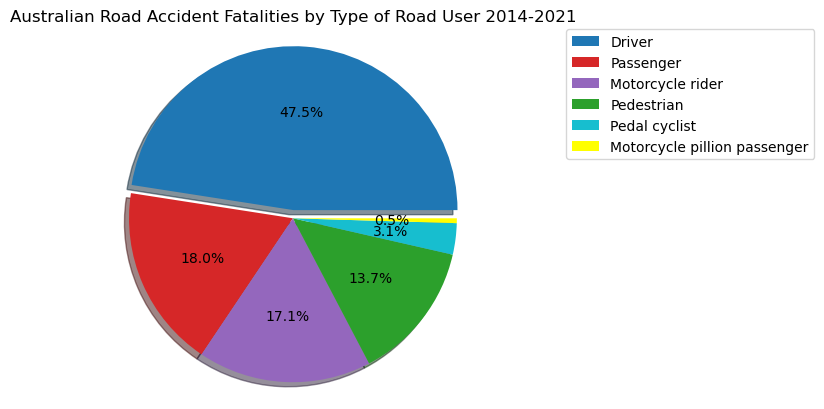

In [3]:
# Generate a pie plot showing the distribution of Type of Road users in Fatalities in Australian crash data 
victim_type_distribution = crash_data_cleaned["Road User"].value_counts()
colours = ["tab:blue","tab:red","tab:purple","tab:green","tab:cyan","yellow"]
victim_type_distribution_pie = victim_type_distribution.plot(autopct="%1.1f%%", kind="pie", colors=colours, 
                                                             shadow=True, explode=[0.05, 0, 0, 0, 0, 0], 
                                                            legend=True, ylabel='',  
                                                title='Australian Road Accident Fatalities by Type of Road User 2014-2021', 
                                                  labeldistance=None)
victim_type_distribution_pie.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axis("equal")
plt.savefig("Images/Road_User_Pie.png")
plt.show()

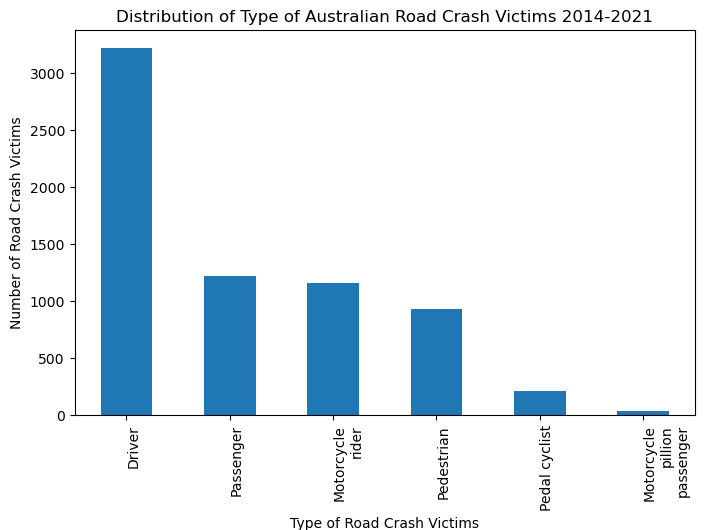

In [4]:
#Plot road user data as a bar chart 
road_user_bar = victim_type_distribution.plot(kind="bar", facecolor="tab:blue", figsize=(8,5), 
                                     title= "Distribution of Type of Australian Road Crash Victims 2014-2021")
road_user_bar.set_xlabel("Type of Road Crash Victims")
road_user_bar.set_ylabel("Number of Road Crash Victims")

xticklabels = victim_type_distribution.index
road_user_bar.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("Images/Road_User_Bar.png")
plt.show()

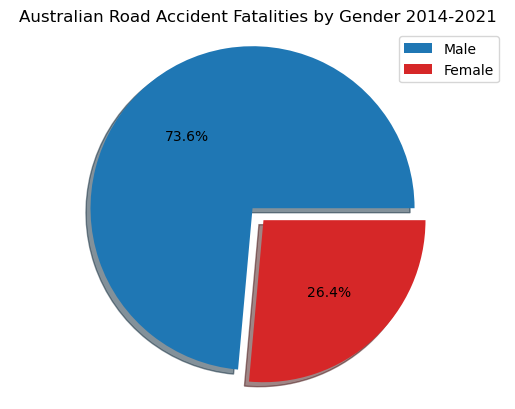

In [5]:
# Generate a pie plot showing the distribution of female versus male crash victims
colours = ["tab:blue", "tab:red"]
gender_distribution = crash_data_cleaned["Gender"].value_counts()
#plt.title("Sex Distribution")
gender_distribution_pie = gender_distribution.plot(autopct="%1.1f%%", kind="pie", colors=colours, 
                                                  shadow=True, explode=[0.05, 0.05], legend=True, ylabel='',  
                                                title='Australian Road Accident Fatalities by Gender 2014-2021', 
                                                  labeldistance=None)
plt.axis("equal")
plt.savefig("Images/Road_Gender_Pie.png")
plt.show()

In [6]:
#Age range data 
# Split total fatalities into age ranges as a series so it can be plotted 
age_range_data = crash_data_cleaned["Age Group"].value_counts()
age_range_data = age_range_data.sort_index()
age_range_data

0_to_16         334
17_to_25       1317
26_to_39       1518
40_to_64       2110
65_to_74        632
75_or_older     855
Name: Age Group, dtype: int64

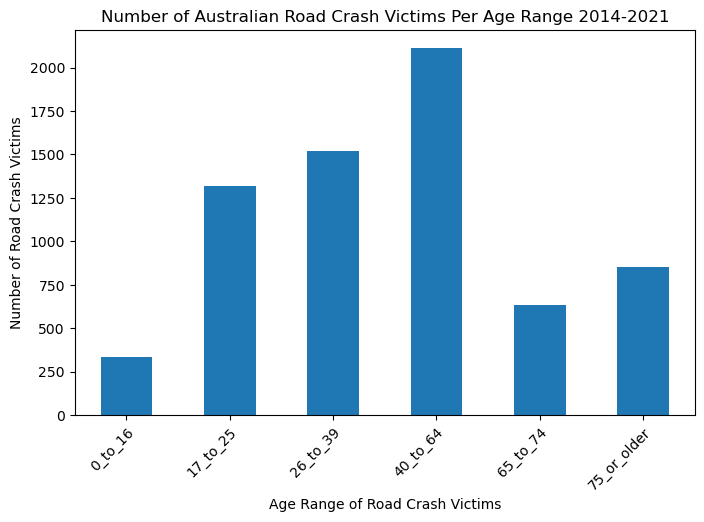

In [7]:
#Plot age range data as a bar chart 
age_data_figure = age_range_data.plot(kind="bar", facecolor="tab:blue", figsize=(8,5), 
                                     title= "Number of Australian Road Crash Victims Per Age Range 2014-2021")
age_data_figure.set_xlabel("Age Range of Road Crash Victims")
age_data_figure.set_ylabel("Number of Road Crash Victims")

xticklabels = age_range_data.index
age_data_figure.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("Images/Age_Range_Bar.png")
plt.show()

In [8]:
#driver data 
#Select data for victims that caused the car crash only, so select data for motocyle or car driver in single vehicle crashes
#this excludes victims who were not in control of the vehicle that crashed 
driver_victim_data = crash_data_cleaned.loc[(crash_data_cleaned["Road User"] == "Driver") &
                                           (crash_data_cleaned["Crash Type"] == "Single") | 
                                            (crash_data_cleaned["Road User"] == "Motorcycle rider") &
                                           (crash_data_cleaned["Crash Type"] == "Single"), :]
driver_victim_data 

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
2,20213092,Qld,9,2021,Saturday,2:00,Single,60,Driver,Male,47,Major Cities of Australia,40_to_64,Night
3,20214053,SA,9,2021,Thursday,21:00,Single,80,Driver,Male,24,Inner Regional Australia,17_to_25,Night
5,20211068,NSW,9,2021,Tuesday,21:50,Single,60,Driver,Female,32,Inner Regional Australia,26_to_39,Night
6,20211169,NSW,9,2021,Saturday,8:05,Single,110,Motorcycle rider,Male,26,Inner Regional Australia,26_to_39,Day
7,20213169,Qld,9,2021,Sunday,13:00,Single,100,Driver,Male,52,Outer Regional Australia,40_to_64,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,20146016,Tas,1,2014,Sunday,18:00,Single,100,Driver,Male,26,Outer Regional Australia,26_to_39,Night
6752,20144013,SA,1,2014,Saturday,1:00,Single,60,Driver,Male,41,Major Cities of Australia,40_to_64,Night
6755,20145020,WA,1,2014,Saturday,12:25,Single,110,Motorcycle rider,Male,43,Inner Regional Australia,40_to_64,Day
6762,20145108,WA,1,2014,Wednesday,11:47,Single,100,Motorcycle rider,Male,46,Major Cities of Australia,40_to_64,Day


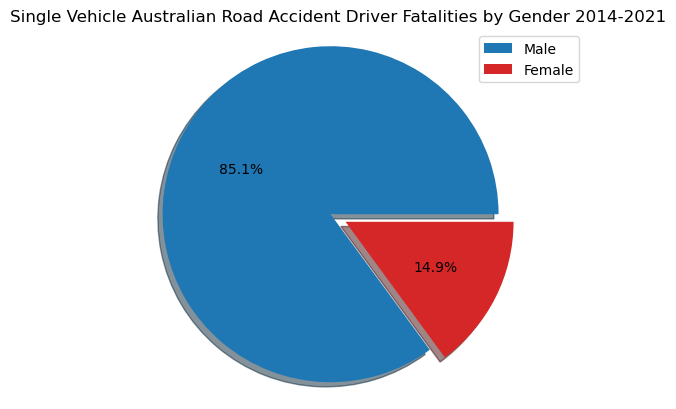

In [9]:
# Generate a pie plot showing the distribution of female versus male crash victims for victims that caused the crash only
colours = ["tab:blue", "tab:red"]
gender_dist = driver_victim_data["Gender"].value_counts()
#plt.title("Sex Distribution")
gender_dist_pie = gender_dist.plot(autopct="%1.1f%%", kind="pie", colors=colours, 
                                                  shadow=True, explode=[0.05, 0.05], legend=True, ylabel='',  
                                                title='Single Vehicle Australian Road Accident Driver Fatalities by Gender 2014-2021', 
                                                  labeldistance=None)
plt.axis("equal")
plt.savefig("Images/Gender_Driver_Pie.png")
plt.show()

In [10]:
#Age range data for victims who caused the crash 
# Make a series that counts the number of crashes per age range so it can be plotted 
age_driver_data = driver_victim_data["Age Group"].value_counts()
age_driver_data = age_driver_data.sort_index()
age_driver_data

0_to_16         21
17_to_25       524
26_to_39       598
40_to_64       757
65_to_74       190
75_or_older    165
Name: Age Group, dtype: int64

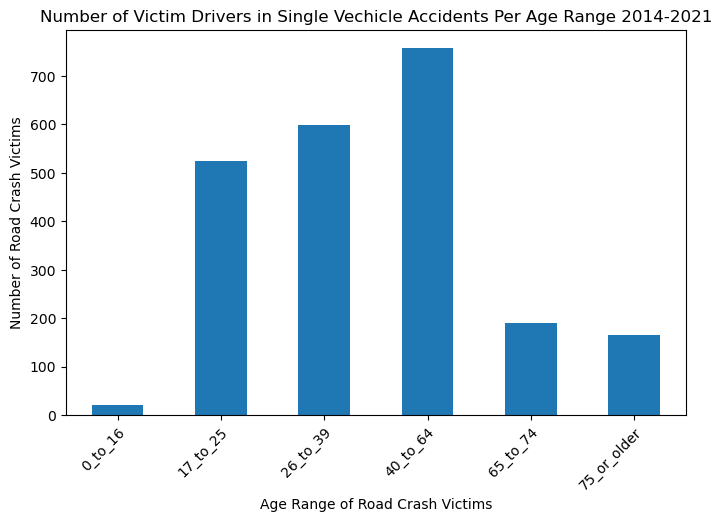

In [11]:
#Plot age range data for drivers who caused the crash as a bar chart 
driver_age_data_figure = age_driver_data.plot(kind="bar", facecolor="tab:blue", figsize=(8,5), 
                                     title= "Number of Victim Drivers in Single Vechicle Accidents Per Age Range 2014-2021")
driver_age_data_figure.set_xlabel("Age Range of Road Crash Victims")
driver_age_data_figure.set_ylabel("Number of Road Crash Victims")

xticklabels = age_range_data.index
driver_age_data_figure.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("Images/Age_Range_Bar.png")
plt.show()

In [12]:
#Find total number of Fatal Australian Crashes in the dataframe to calculate percentage 
#each age range represents 
total_crash_victims = crash_data_cleaned["Crash ID"].count()
total_crash_victims

6766

In [13]:
#Find total number of Fatal Australian Crashes where the victim caused the crash in the dataframe to calculate percentage
#each age range represents 
total_driver_crash_data = driver_victim_data["Crash ID"].count()
total_driver_crash_data

2255

In [14]:
#calculate percentage each age range represents of total crash fatalities  
age_driver_data_percentage = age_driver_data/total_driver_crash_data *100
age_driver_data_percentage

0_to_16         0.931264
17_to_25       23.237251
26_to_39       26.518847
40_to_64       33.569845
65_to_74        8.425721
75_or_older     7.317073
Name: Age Group, dtype: float64

In [15]:
#calculate percentage each age range represents in crashes where the victim was the cause of the crash 
age_range_data_percentage = age_range_data/total_crash_victims *100
age_range_data_percentage

0_to_16         4.936447
17_to_25       19.464972
26_to_39       22.435708
40_to_64       31.185338
65_to_74        9.340822
75_or_older    12.636713
Name: Age Group, dtype: float64

In [16]:
#Compare the distribution of age ranges in total crash fatalities and fatalities of drivers in the crash by combining the 
#series in a dataframe 
victim_age_percentage_summary = pd.DataFrame({"Total Crash Fatalities": age_range_data_percentage,
                                  "Driver Fatalities From Single Car Accidents":
                                               age_driver_data_percentage})
victim_age_percentage_summary


,Total Crash Fatalities,Driver Fatalities From Single Car Accidents
0_to_16,4.936447,0.931264
17_to_25,19.464972,23.237251
26_to_39,22.435708,26.518847
40_to_64,31.185338,33.569845
65_to_74,9.340822,8.425721
75_or_older,12.636713,7.317073


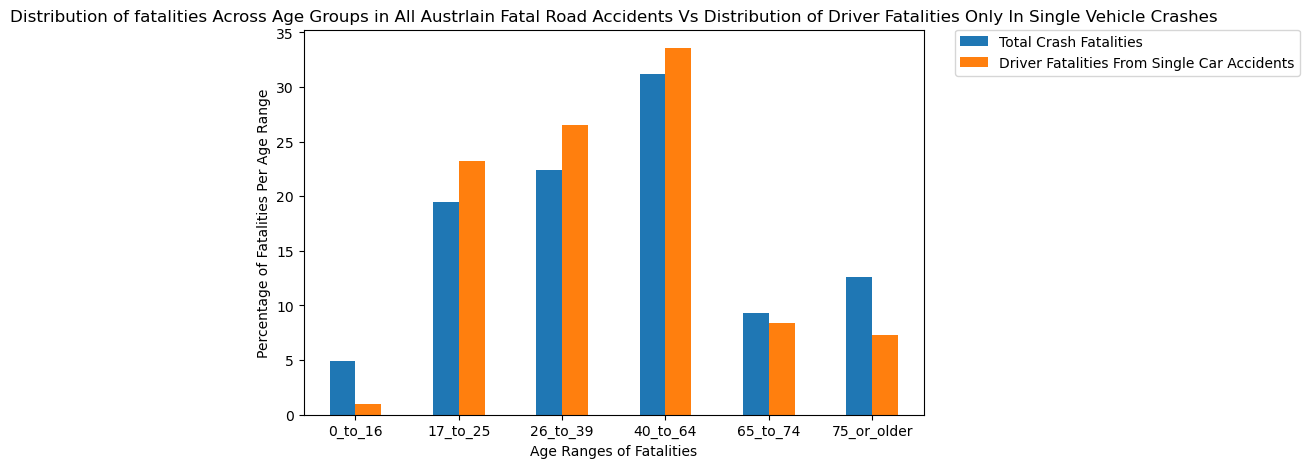

In [17]:
#Compare the distribution of age ranges in total crash fatalities and fatalities of drivers in the crash in a bar chart
percentage_combined_plot = victim_age_percentage_summary.plot.bar(rot=0, xlabel="Age Ranges of Fatalities", figsize=(8,5), 
                                                                  title="Distribution of fatalities Across Age Groups in All Austrlain Fatal Road Accidents Vs Distribution of Driver Fatalities Only In Single Vehicle Crashes", 
                                                                  ylabel="Percentage of Fatalities Per Age Range")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("Images/Age_Range_comparison_Bar.png")
plt.show()

In [18]:
#Count the number of Road fatalities per discrete age 
discrete_age_data = crash_data_cleaned["Age"].value_counts()
discrete_age_data = discrete_age_data.sort_index()
discrete_age_data 

0      12
1      16
2      18
3      10
4      17
       ..
95      7
96      5
97      6
99      1
101     1
Name: Age, Length: 100, dtype: int64

In [19]:
#turn the series into a dataframe for statisitical analysis
victim_age_summary = pd.DataFrame({"Number of Crash Fatalities in All Accidents": discrete_age_data})
victim_age_summary= victim_age_summary.reset_index()
victim_age_summary= victim_age_summary.rename(columns={"index": "Age"})
victim_age_summary

,Age,Number of Crash Fatalities in All Accidents
0,0,12
1,1,16
2,2,18
3,3,10
4,4,17
...,...,...
95,95,7
96,96,5
97,97,6
98,99,1


In [20]:
#Use the aggregation method to find the summary statistics for age of fatalities in road crash accidents 
agg_summary = discrete_age_data.agg(["mean", "median", "var", "std", "sem"])
agg_summary

mean        67.660000
median      66.000000
var       1836.448889
std         42.853808
sem          4.285381
Name: Age, dtype: float64

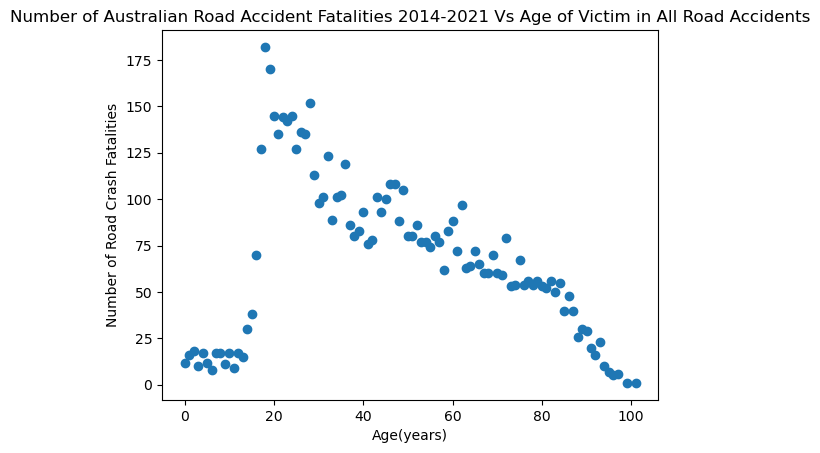

In [21]:
#Create a scatter plot of age of victim vs the number of fatal crashes 
Age = victim_age_summary.iloc[:,0]
Number_of_Fatalities = victim_age_summary.iloc[:,1]
plt.scatter(Age, Number_of_Fatalities)
plt.xlabel("Age(years)")
plt.ylabel("Number of Road Crash Fatalities")
plt.savefig("Images/Age_Scatter.png")
plt.title("Number of Australian Road Accident Fatalities 2014-2021 Vs Age of Victim in All Road Accidents")
plt.show()

The correlation between Age and the Number of Crash Fatalities is -0.27


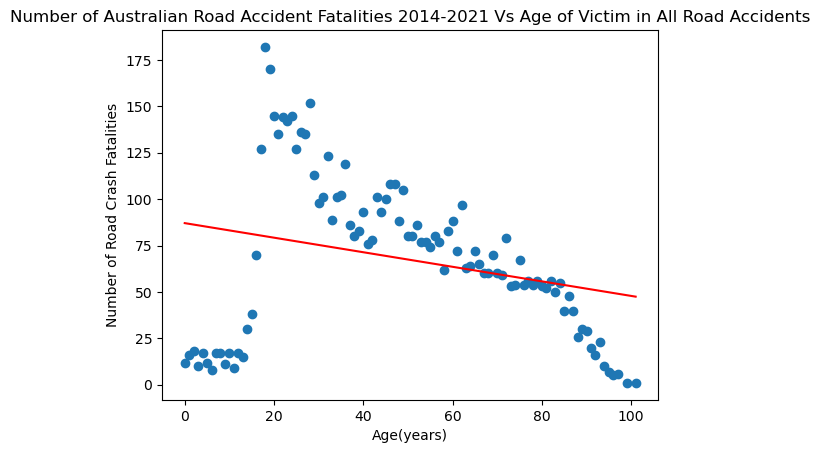

In [22]:
# Calculate the correlation coefficient and a linear regression model to show the relationship between age of the 
#victim and the number of crashes 


correlation = st.pearsonr(Age,Number_of_Fatalities)
print(f"The correlation between Age and the Number of Crash Fatalities is {round(correlation[0],2)}")

x_values = victim_age_summary.iloc[:,0]
y_values = victim_age_summary.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Number of Australian Road Accident Fatalities 2014-2021 Vs Age of Victim in All Road Accidents")
plt.xlabel("Age(years)")
plt.ylabel("Number of Road Crash Fatalities")
plt.savefig("Images/Age_Scatter_correlation.png")
plt.show()

In [23]:
#Count the number of Road fatalities where the victim was the cuase of the crash per discrete age 
discrete_age_data_driver = driver_victim_data["Age"].value_counts()
discrete_age_data_driver = discrete_age_data_driver.sort_index()
discrete_age_data_driver 

7      1
13     1
14     2
15     1
16    16
      ..
92     5
93     3
94     1
96     1
97     2
Name: Age, Length: 85, dtype: int64

In [24]:
#Use the aggregation method to find the summary statistics for age of fatalities in road crash accidents where
#the victim was the cause of the crash 
agg_driver_summary = discrete_age_data_driver.agg(["mean", "median", "var", "std", "sem"])
agg_driver_summary

mean       26.529412
median     24.000000
var       343.323529
std        18.528992
sem         2.009751
Name: Age, dtype: float64

In [25]:
#turn the series into a dataframe for statisitical analysis
driver_victim_age_summary = pd.DataFrame({"Number of Fatalities in Drivers of Single Car Accidents": discrete_age_data_driver})
driver_victim_age_summary= driver_victim_age_summary.reset_index()
driver_victim_age_summary= driver_victim_age_summary.rename(columns={"index": "Age"})
driver_victim_age_summary

,Age,Number of Fatalities in Drivers of Single Car Accidents
0,7,1
1,13,1
2,14,2
3,15,1
4,16,16
...,...,...
80,92,5
81,93,3
82,94,1
83,96,1


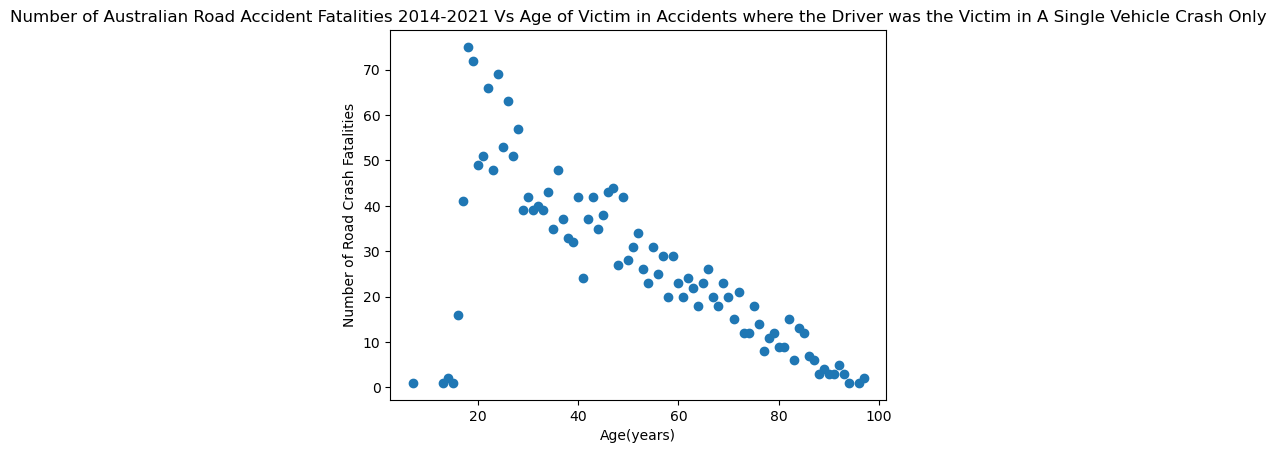

In [26]:
#Create a scatter plot of age of victim vs the number of fatal crashes where the victim was the cause of the crash 
Age_victim = driver_victim_age_summary.iloc[:,0]
Number_of_Fatalities_victim = driver_victim_age_summary.iloc[:,1]
plt.scatter(Age_victim, Number_of_Fatalities_victim)
plt.xlabel("Age(years)")
plt.ylabel("Number of Road Crash Fatalities")
plt.title("Number of Australian Road Accident Fatalities 2014-2021 Vs Age of Victim in Accidents where the Driver was the Victim in A Single Vehicle Crash Only")
plt.savefig("Images/Age_dirver_Scatter.png")
plt.show()

The correlation between Age and the Number of Crash Fatalities is -0.68


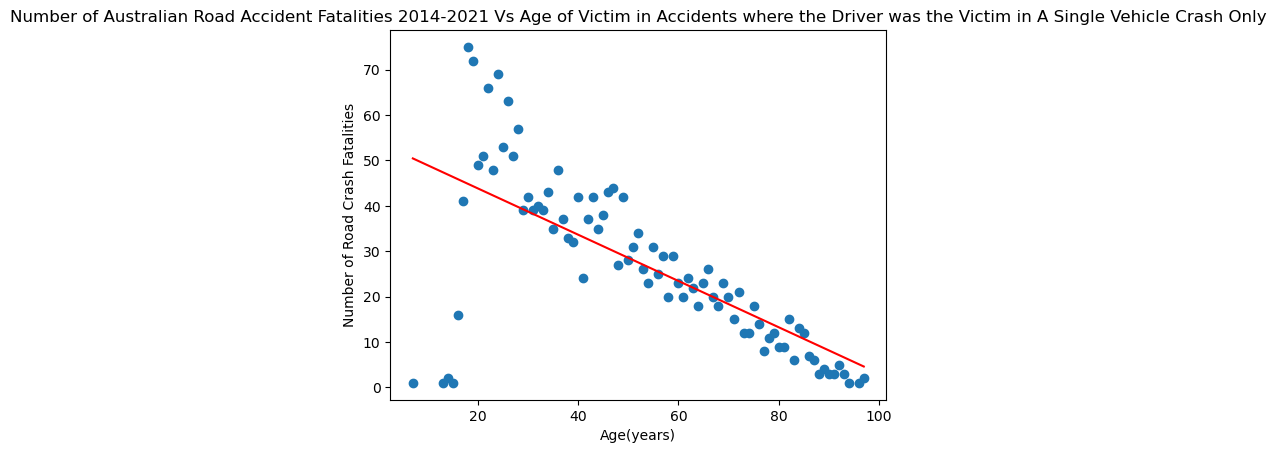

In [27]:
# Calculate the correlation coefficient and a linear regression model to show the relationship between age of the 
#victim and the number of crashes 
correlation = st.pearsonr(Age_victim,Number_of_Fatalities_victim)
print(f"The correlation between Age and the Number of Crash Fatalities is {round(correlation[0],2)}")

x_values = driver_victim_age_summary.iloc[:,0]
y_values = driver_victim_age_summary.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Age(years)")
plt.ylabel("Number of Road Crash Fatalities")
plt.title("Number of Australian Road Accident Fatalities 2014-2021 Vs Age of Victim in Accidents where the Driver was the Victim in A Single Vehicle Crash Only")
plt.savefig("Images/Age_driver_Scatter_correlation.png")
plt.show()